In [1]:
%load_ext autoreload
%autoreload 2

# MNIST database of handwritten digits
### (Modified National Institute of Standards and Technology database)

https://en.wikipedia.org/wiki/MNIST_database

- Mas de 20 años de publicaciones al respecto
- Muy investigado y mucha documentación

Referencias:
https://www.youtube.com/watch?v=vq2nnJ4g6N0&t=1426s

In [2]:
import keras
import numpy as np
from matplotlib import pyplot as plt
from fnn_helper import PlotLosses
from MNIST_helper import plot_numbers, visualize_input
import draw_nn
plot_losses = PlotLosses()

Using TensorFlow backend.


## Importo el dataset

In [3]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
print('Training set:', x_train.shape)
print('Training labels:', y_train.shape)
print('Testing set:',x_test.shape)
print('Testing labels:', y_train.shape)

Training set: (60000, 28, 28)
Training labels: (60000,)
Testing set: (10000, 28, 28)
Testing labels: (60000,)


## Grafico los primeros dígitos

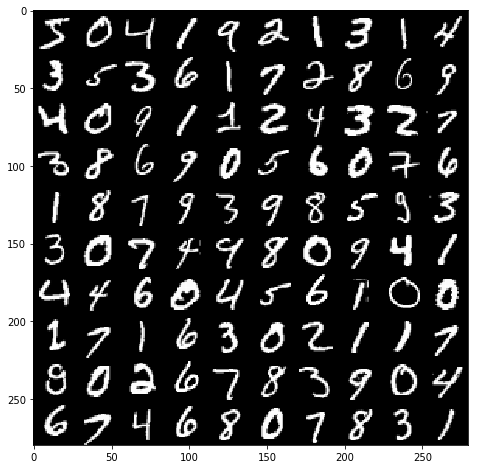

In [5]:
plot_numbers(x_train,range(100), columns=10, figsize=(8, 8))

## Vizualizo un dígito

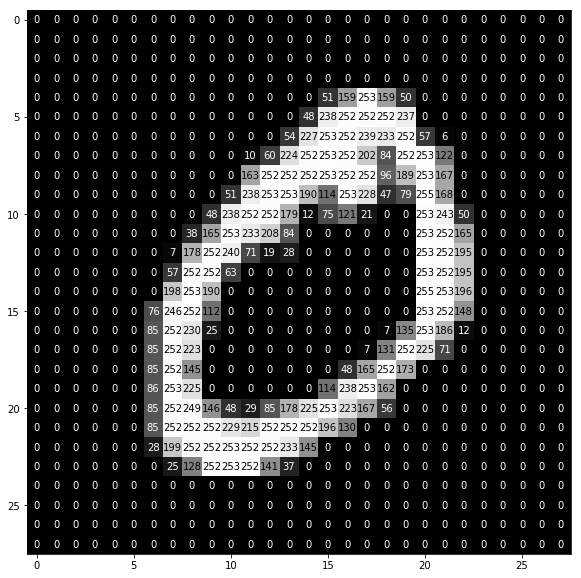

In [6]:
fig = plt.figure(figsize = (10,10)) 
ax = fig.add_subplot(111)
visualize_input(x_train[1], ax)
plt.show()

# Regresión logística multinomial

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import fetch_mldata

In [8]:
x_train_flattened = x_train.reshape(-1,784)
x_test_flattened = x_test.reshape(-1,784)

In [9]:
clf_logistic = LogisticRegression(multi_class='multinomial', solver='saga', max_iter=10, tol=0.05)
clf_logistic.fit(x_train_flattened, y_train)
train_score_logistic = clf_logistic.score(x_train_flattened, y_train)
test_score_logistic = clf_logistic.score(x_test_flattened, y_test)
print(train_score_logistic, test_score_logistic)

0.9313 0.9261


# Red lo más simple posible

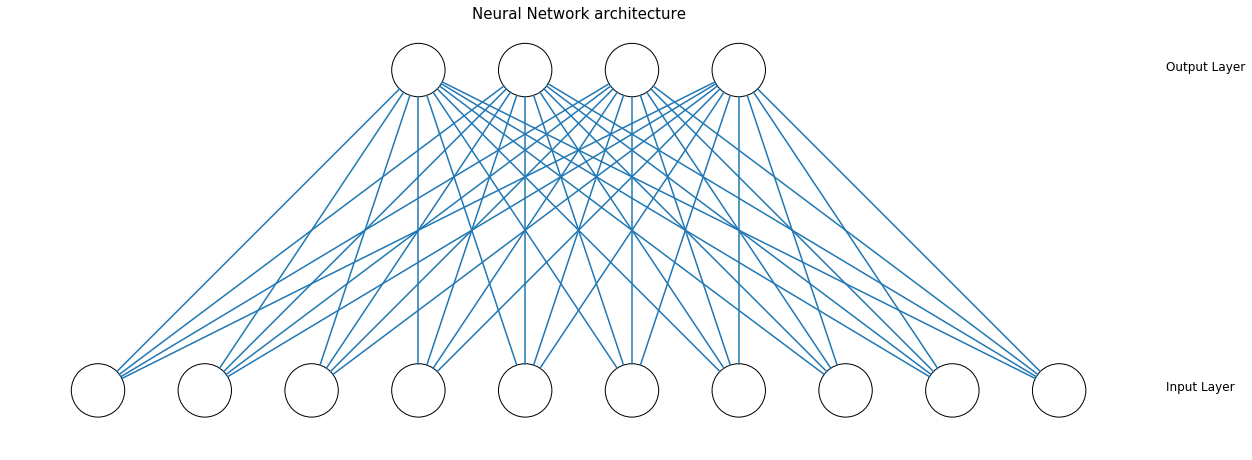

Realmente tengo 784 neuronas en la entrada y 10 en la salida


In [10]:
network = draw_nn.DrawNN( [10,4] )
network.draw()
print("Realmente tengo 784 neuronas en la entrada y 10 en la salida")

In [11]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.normalization import BatchNormalization
from keras import optimizers
from keras.utils import np_utils

In [12]:
x_train.shape[1:]

(28, 28)

## Acomodo Salida: one-hot encoding

In [28]:
y_train_categorical = keras.utils.to_categorical(y_train)
y_test_categorical = keras.utils.to_categorical(y_test)
y_train_categorical.shape

(60000, 10)

Probar con:
- lr = 0.0003; kernel_initializer='zeros'
- lr = 0.0003; kernel_initializer='normal'

# Armamos el modelo

In [110]:
output_size = 10
model = Sequential()
model.add(Flatten(input_shape=x_train.shape[1:]))
initializer = keras.initializers.RandomNormal(mean=0.0, stddev=0.01, seed=1)
model.add(Dense(output_size, kernel_initializer='zeros', name='Entrada'))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_23 (Flatten)         (None, 784)               0         
_________________________________________________________________
Entrada (Dense)              (None, 10)                7850      
_________________________________________________________________
activation_14 (Activation)   (None, 10)                0         
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


¿Por que tiene esa cantidad de parametros?

Función de activación

## Compilamos el modelo

In [111]:
import tensorflow as tf

In [112]:
adam = optimizers.Adam(lr=0.000001)

model.compile(loss = 'categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

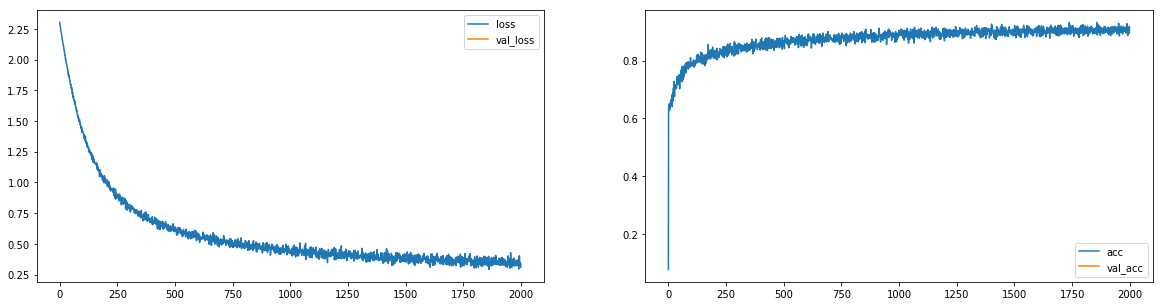

60000/60000 [==============================] - 1s - loss: 0.3462 - acc: 0.9076 - val_loss: 0.3317 - val_acc: 0.9110
Epoch 35/100
60000/60000 [==============================] - 0s - loss: 0.3431 - acc: 0.9084 - val_loss: 0.3290 - val_acc: 0.9114
Epoch 36/100
60000/60000 [==============================] - 0s - loss: 0.3402 - acc: 0.9087 - val_loss: 0.3264 - val_acc: 0.9127
Epoch 37/100
60000/60000 [==============================] - 0s - loss: 0.3374 - acc: 0.9096 - val_loss: 0.3246 - val_acc: 0.9121
Epoch 38/100
60000/60000 [==============================] - 0s - loss: 0.3348 - acc: 0.9099 - val_loss: 0.3218 - val_acc: 0.9132
Epoch 39/100
60000/60000 [==============================] - 0s - loss: 0.3322 - acc: 0.9103 - val_loss: 0.3197 - val_acc: 0.9129
Epoch 40/100
60000/60000 [==============================] - 0s - loss: 0.3298 - acc: 0.9110 - val_loss: 0.3175 - val_acc: 0.9133
Epoch 41/100
60000/60000 [==============================] - 0s - loss: 0.3276 - acc: 0.9113 - val_loss: 0.3160

KeyboardInterrupt: 

In [113]:
model.fit(x_train, 
          y_train_categorical ,
          epochs=100, batch_size=1000, 
          verbose=1, 
          validation_data=(x_test, y_test_categorical), 
          callbacks=[plot_losses],
         )

# Red de 2 capas

Que pasa con kernel_initializar = zeros?

In [52]:
output_size = 10
model = Sequential()
model.add(Flatten(input_shape=x_train.shape[1:]))
model.add(Dense(800, activation='sigmoid', kernel_initializer='zeros', name='middle'))
model.add(Dense(output_size, activation='softmax', kernel_initializer='normal', name='Salida'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 784)               0         
_________________________________________________________________
middle (Dense)               (None, 800)               628000    
_________________________________________________________________
Salida (Dense)               (None, 10)                8010      
Total params: 636,010
Trainable params: 636,010
Non-trainable params: 0
_________________________________________________________________


In [54]:
first_layer = 784*800+800
print(first_layer)
last_layer = 800*10 + 10
print(last_layer)
print(first_layer+last_layer)

628000
8010
636010


In [19]:
adam = optimizers.Adam()
model.compile(loss = 'categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

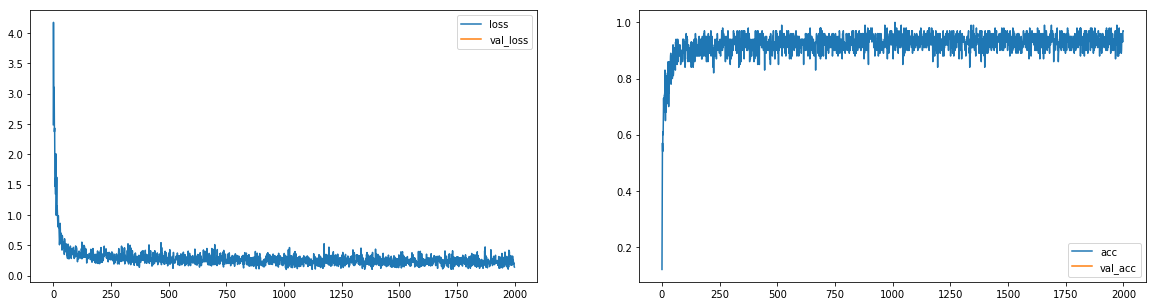

51900/60000 [========================>.....] - ETA: 1s - loss: 0.2244 - acc: 0.9360

KeyboardInterrupt: 

In [20]:
model.fit(x_train, 
          y_train_categorical ,
          epochs=100, batch_size=100, 
          #verbose=1, 
          validation_data=(x_test, y_test_categorical), 
          callbacks=[plot_losses],
         )

# Red de 5 capas
** Relus **

In [21]:
output_size = 10
initializer = keras.initializers.RandomNormal(mean=0.0, stddev=0.1, seed=None)
model = Sequential()
model.add(Flatten(input_shape=x_train.shape[1:]))
model.add(Dense(200, activation='relu', kernel_initializer='normal', name='middle1'))
model.add(Dense(100, activation='relu', kernel_initializer='normal', name='middle2'))
model.add(Dense(60, activation='relu', kernel_initializer='normal', name='middle3'))
model.add(Dense(30, activation='relu', kernel_initializer='normal', name='middle4'))
model.add(Dense(output_size, activation='softmax', kernel_initializer='normal', name='salida'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
middle1 (Dense)              (None, 200)               157000    
_________________________________________________________________
middle2 (Dense)              (None, 100)               20100     
_________________________________________________________________
middle3 (Dense)              (None, 60)                6060      
_________________________________________________________________
middle4 (Dense)              (None, 30)                1830      
_________________________________________________________________
salida (Dense)               (None, 10)                310       
Total params: 185,300
Trainable params: 185,300
Non-trainable params: 0
_________________________________________________________________


In [22]:
adam = optimizers.Adam(lr=0.001, decay=0.0) #decay=1e-4
model.compile(loss = 'categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

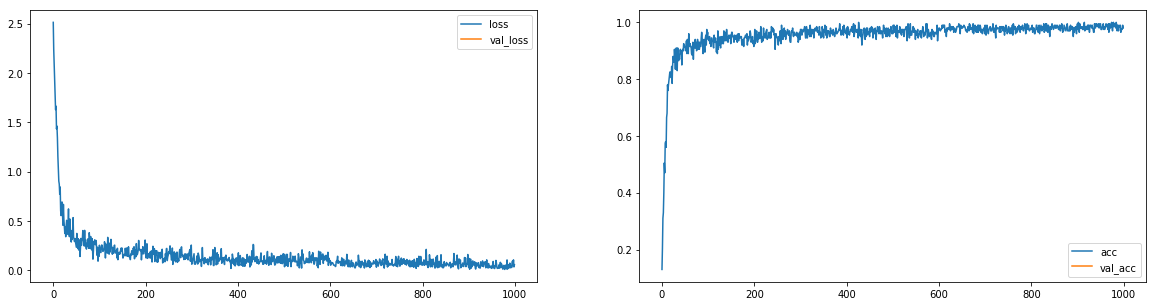

60000/60000 [==============================] - 3s - loss: 0.0555 - acc: 0.9827 - val_loss: 0.0922 - val_acc: 0.9744
Epoch 5/2000
60000/60000 [==============================] - 3s - loss: 0.0451 - acc: 0.9854 - val_loss: 0.1078 - val_acc: 0.9700
Epoch 6/2000
58000/60000 [============================>.] - ETA: 0s - loss: 0.0397 - acc: 0.9870

KeyboardInterrupt: 

In [23]:
model.fit(x_train, 
          y_train_categorical ,
          epochs=2000, batch_size=200, 
          #verbose=1, 
          validation_data=(x_test, y_test_categorical), 
          callbacks=[plot_losses],
         )

# Limitaciones de MLP para clasificación de imágenes:
- Cantidad muy grande de parametros!
- Se pierde morfología con el flatten. 